<a href="https://colab.research.google.com/github/NainaAgrawal/ecommerce_sales_analysis/blob/main/ecommerceanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['Brazilian E-Commerce Public Dataset by Olist'](https://www.kaggle.com/olistbr/brazilian-ecommerce)
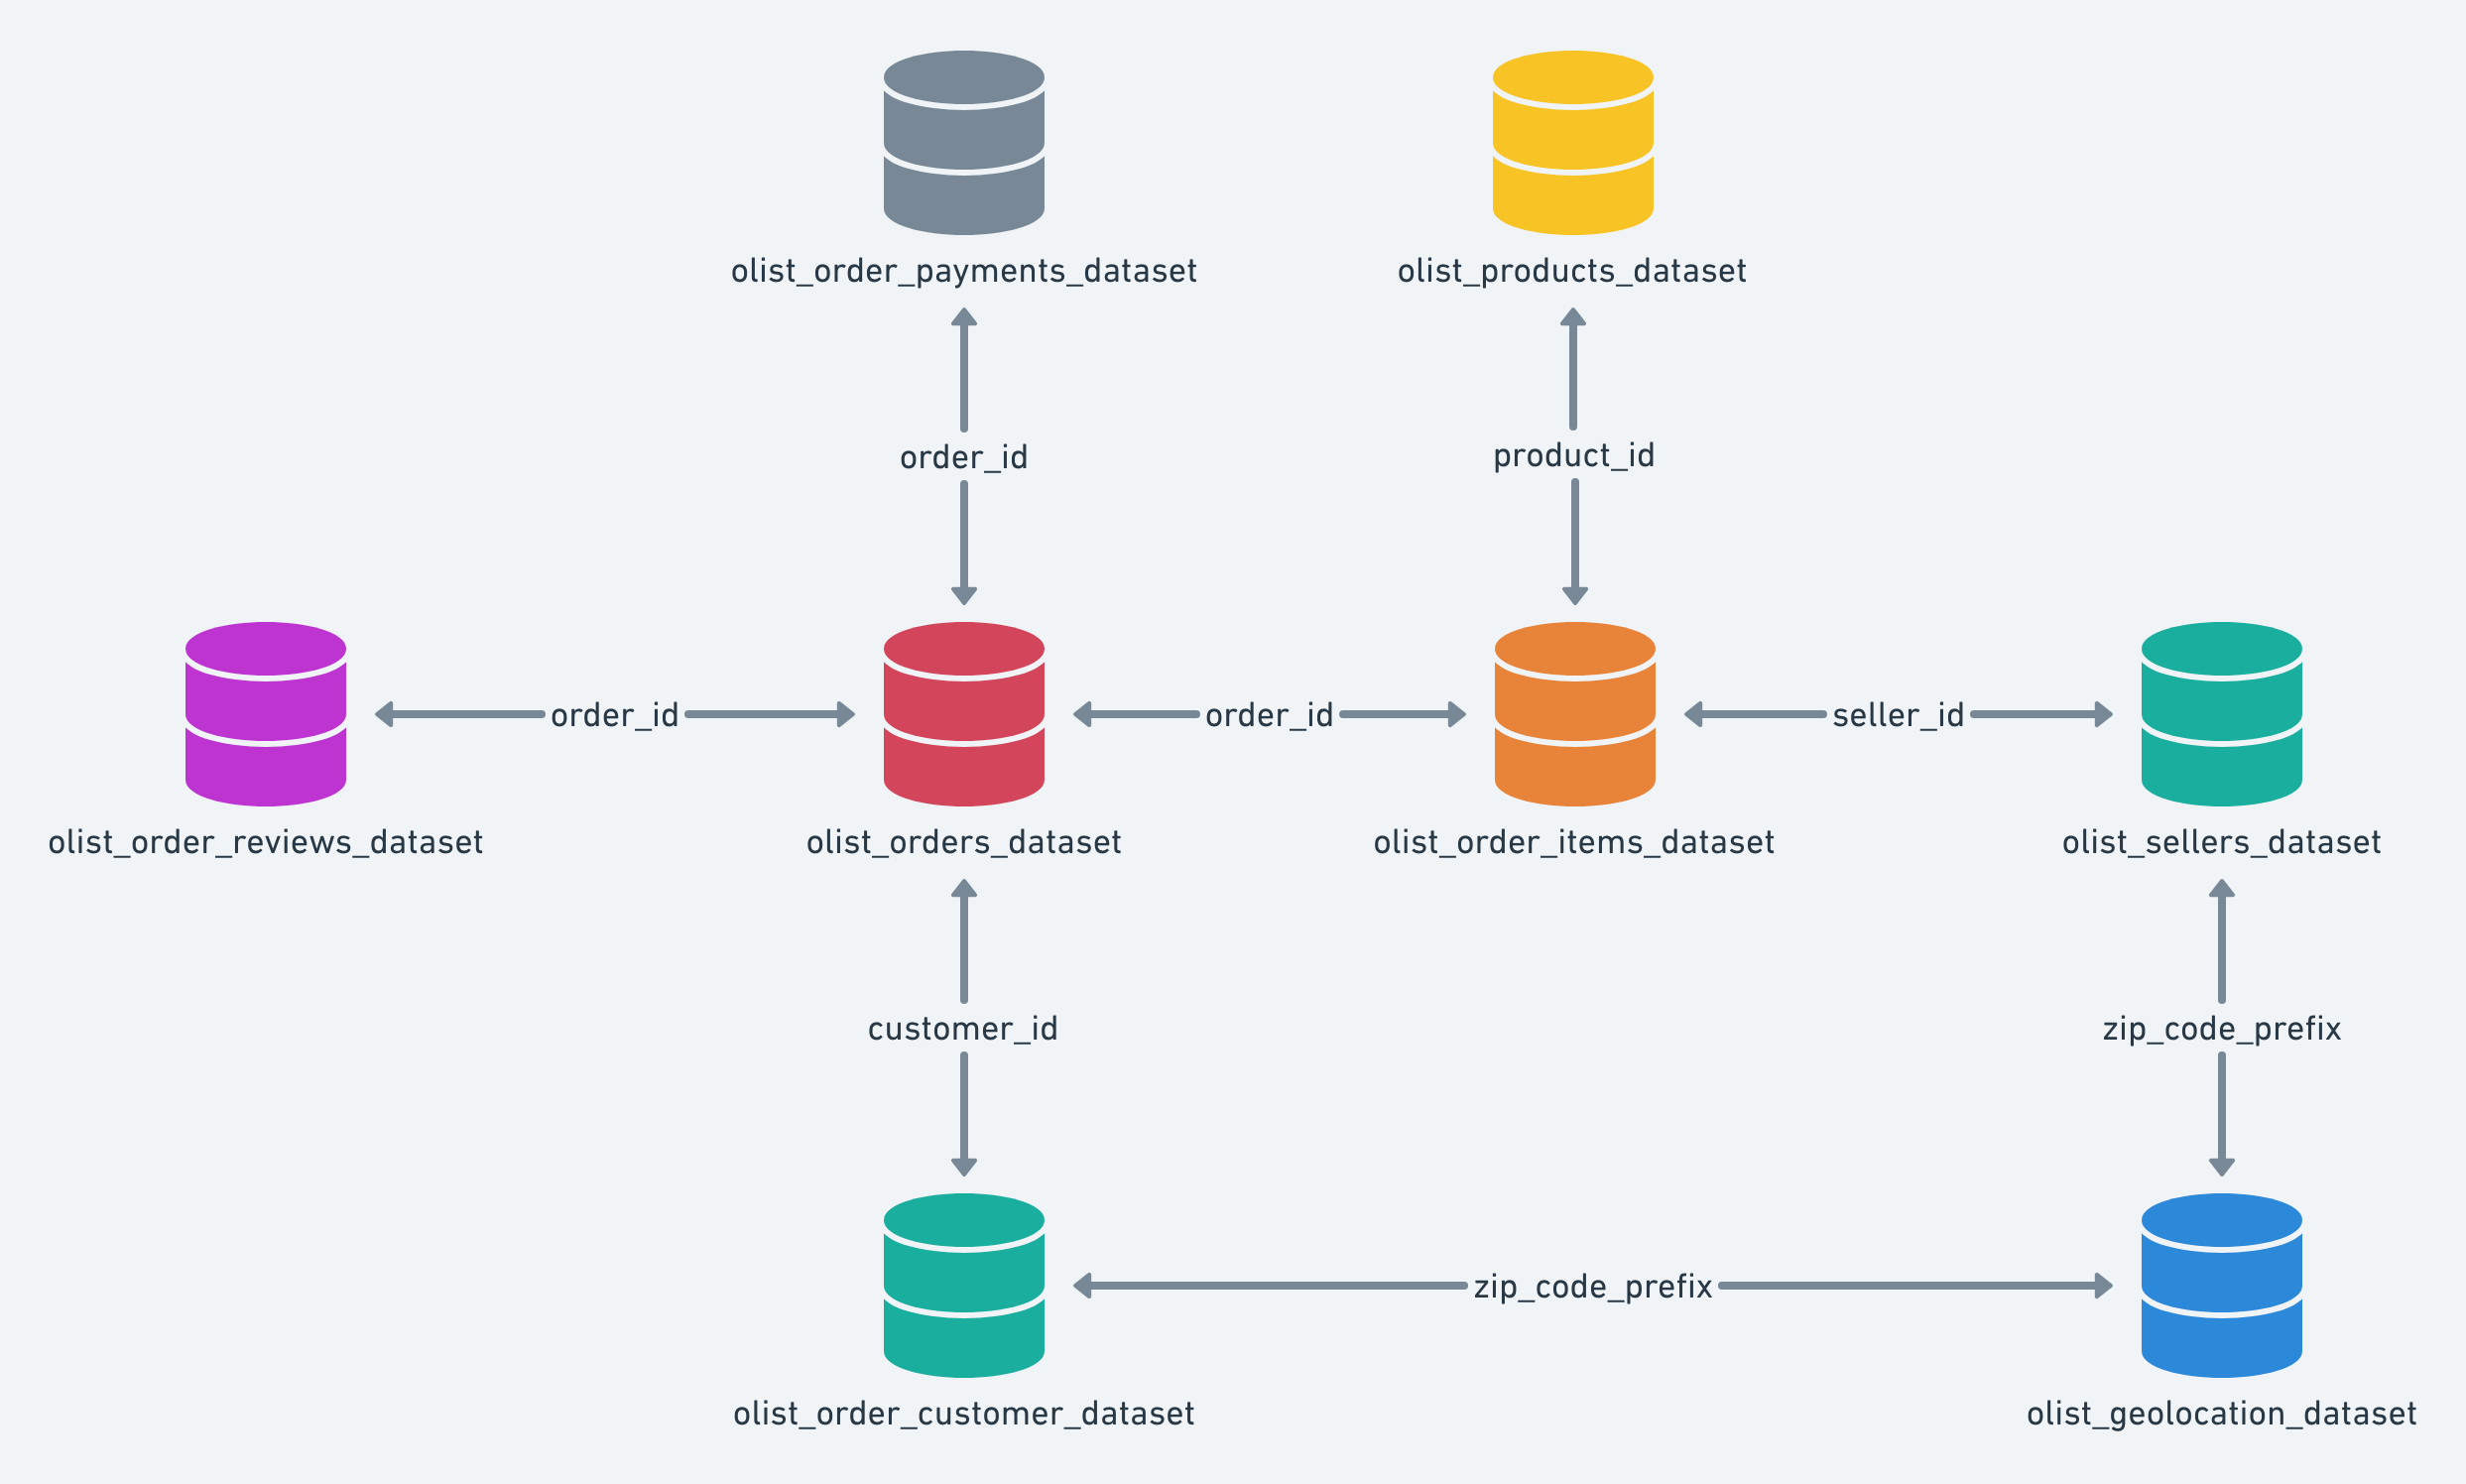

Importing Packages and Data: **START**

In [1]:
%%time
!wget https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz

--2021-06-23 02:19:28--  https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228834641 (218M) [application/x-gzip]
Saving to: ‘spark-3.1.2-bin-hadoop3.2.tgz’

spark-3.1.2-bin-had 100%[===================>] 218.23M  20.7MB/s    in 10s     

2021-06-23 02:19:39 (21.9 MB/s) - ‘spark-3.1.2-bin-hadoop3.2.tgz’ saved [228834641/228834641]

CPU times: user 155 ms, sys: 22.3 ms, total: 178 ms
Wall time: 10.5 s


In [2]:
!tar xf spark-3.1.2-bin-hadoop3.2.tgz

In [3]:
%%time
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# !wget -q  https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
# !tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark   

     |████████████████████████████████| 212.4MB 67kB/s 
     |████████████████████████████████| 204kB 18.4MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=647f1ed2a593f67aabc8a291561f5b279e2dfbcf3d0759c875d17a64b1cb55de
  Stored in directory: /root/.cache/pip/wheels/40/1b/2c/30f43be2627857ab80062bef1527c0128f7b4070b6b2d02139
Successfully built pyspark
CPU times: user 768 ms, sys: 131 ms, total: 898 ms
Wall time: 56.3 s


In [4]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

In [5]:
import findspark
findspark.init()

import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

sc = spark.sparkContext

from pyspark.sql import HiveContext
hc = HiveContext(sc)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import tqdm
pd.set_option('display.max_colwidth', None)

# from pyspark.ml.feature import OneHotEncoder, StringIndexer, IndexToString, VectorAssembler
# from pyspark.ml.regression import RandomForestRegressor, LinearRegression
# from pyspark.ml.evaluation import MulticlassClassificationEvaluator, RegressionEvaluator
# from pyspark.ml import Pipeline, Model
from pyspark.sql.functions import col

# for google colab
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive/', force_remount=True )

import os
os.chdir("/content/drive/My Drive/Colab Notebooks/Brazilian_ECommerce_Dataset")
!ls

Mounted at /content/drive/
 bcim_2016_21_11_2018.gpkg	        d1_customer_distance_km.xlsx
'Brazilian E-Commerce Public Dataset'   ecommerceanalysis.ipynb




1.   Product analysis; Which product is sold most
2.   Seller analysis
3.   seller rating Feature engineering
4.   seller data
5.   order data analysis



In [7]:
ls 'Brazilian E-Commerce Public Dataset'

olist_customers_dataset.csv       olist_orders_dataset.csv
olist_geolocation_dataset.csv     olist_products_dataset.csv
olist_order_items_dataset.csv     olist_sellers_dataset.csv
olist_order_payments_dataset.csv  product_category_name_translation.csv
olist_order_reviews_dataset.csv


In [8]:
cus = pd.read_csv('Brazilian E-Commerce Public Dataset/olist_customers_dataset.csv', dtype = str) # loading csv file with every field as string dtype
hc.createDataFrame(cus.astype(str)).registerTempTable('cus')   # converting python dataframe to pyspark dataframe, then creating hive table for the dataframe
geo = pd.read_csv('Brazilian E-Commerce Public Dataset/olist_geolocation_dataset.csv', dtype = str)
hc.createDataFrame(geo.astype(str)).registerTempTable('geo')
ord = pd.read_csv('Brazilian E-Commerce Public Dataset/olist_orders_dataset.csv', dtype = str)
hc.createDataFrame(ord.astype(str)).registerTempTable('ord')
ordit = pd.read_csv('Brazilian E-Commerce Public Dataset/olist_order_items_dataset.csv', dtype = str)
hc.createDataFrame(ordit.astype(str)).registerTempTable('ordit')
ordpy = pd.read_csv('Brazilian E-Commerce Public Dataset/olist_order_payments_dataset.csv', dtype = str)
hc.createDataFrame(ordpy.astype(str)).registerTempTable('ordpy')
ordrv = pd.read_csv('Brazilian E-Commerce Public Dataset/olist_order_reviews_dataset.csv', dtype = str)
hc.createDataFrame(ordrv.astype(str)).registerTempTable('ordrv')
prod = pd.read_csv('Brazilian E-Commerce Public Dataset/olist_products_dataset.csv', dtype = str)
hc.createDataFrame(prod.astype(str)).registerTempTable('prod')
prodcat = pd.read_csv('Brazilian E-Commerce Public Dataset/product_category_name_translation.csv', dtype = str)
hc.createDataFrame(prodcat.astype(str)).registerTempTable('prodcat')
sell = pd.read_csv('Brazilian E-Commerce Public Dataset/olist_sellers_dataset.csv', dtype = str)
hc.createDataFrame(sell.astype(str)).registerTempTable('sell')

In [9]:
hc.sql("SHOW TABLES").show()

+--------+---------+-----------+
|database|tableName|isTemporary|
+--------+---------+-----------+
|        |      cus|       true|
|        |      geo|       true|
|        |      ord|       true|
|        |    ordit|       true|
|        |    ordpy|       true|
|        |    ordrv|       true|
|        |     prod|       true|
|        |  prodcat|       true|
|        |     sell|       true|
+--------+---------+-----------+



In [10]:
cus.columns, geo.columns, ord.columns, ordit.columns, ordpy.columns, ordrv.columns, prod.columns, prodcat.columns, sell.columns

(Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
        'customer_city', 'customer_state'],
       dtype='object'),
 Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
        'geolocation_city', 'geolocation_state'],
       dtype='object'),
 Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
        'order_approved_at', 'order_delivered_carrier_date',
        'order_delivered_customer_date', 'order_estimated_delivery_date'],
       dtype='object'),
 Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
        'shipping_limit_date', 'price', 'freight_value'],
       dtype='object'),
 Index(['order_id', 'payment_sequential', 'payment_type',
        'payment_installments', 'payment_value'],
       dtype='object'),
 Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
        'review_comment_message', 'review_creation_date',
        'review_answer_timestamp'],
       dtype='object'),


Importing Packages and Data: **STOP**

# Merge tables order, order_item, products 
inorder to conclude which product is sold the most.


### Table name, Count of records, Number of Columns, Count of Unique id of each Column/Table.

In [11]:
l1, l2, l3, l4 = [], [], [], []
for i in tqdm.tqdm(hc.sql('''show tables''').toPandas()['tableName'].to_list()):
  l1.append(i)
  l2.append(hc.sql(f'''select count(*) as counts from {i}''').toPandas()['counts'].to_list()[0])
  l3.append(hc.sql(f'''select * from {i} limit 0''').toPandas().shape[1])
  l5 = []
  for j in ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'geolocation_zip_code_prefix', 'order_id', 'order_item_id', 
            'product_id', 'seller_id', 'review_id', 'product_category_name', 'product_category_name_english', 'seller_zip_code_prefix']:
    try:
      l5.append({j : hc.sql(f'''select count(distinct {j}) as counts from {i}''').toPandas()['counts'].to_list()[0]})
    except:
      pass
  l4.append(l5)

100%|██████████| 9/9 [00:55<00:00,  6.15s/it]


In [12]:
pd.DataFrame({'name' : l1, 'records' : l2, 'columns' : l3, 'distinctColCounts' : l4} )

,name,records,columns,distinctColCounts
0,cus,99441,5,"[{'customer_id': 99441}, {'customer_unique_id': 96096}, {'customer_zip_code_prefix': 14994}]"
1,geo,1000163,5,[{'geolocation_zip_code_prefix': 19015}]
2,ord,99441,8,"[{'customer_id': 99441}, {'order_id': 99441}]"
3,ordit,112650,7,"[{'order_id': 98666}, {'order_item_id': 21}, {'product_id': 32951}, {'seller_id': 3095}]"
4,ordpy,103886,5,[{'order_id': 99440}]
5,ordrv,100000,7,"[{'order_id': 99441}, {'review_id': 99173}]"
6,prod,32951,9,"[{'product_id': 32951}, {'product_category_name': 74}]"
7,prodcat,71,2,"[{'product_category_name': 71}, {'product_category_name_english': 71}]"
8,sell,3095,4,"[{'seller_id': 3095}, {'seller_zip_code_prefix': 2246}]"


**Merge all tables**


In [13]:
hc.sql('''select * from ordrv limit 2''').toPandas()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,nan,nan,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,nan,nan,2018-03-10 00:00:00,2018-03-11 03:05:13


In [14]:
', '.join(hc.sql('''select * from geo limit 0''').columns)

'geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state'

In [15]:
hc.sql('''select count(distinct seller_zip_code_prefix) from sell limit 1''').toPandas()

,count(DISTINCT seller_zip_code_prefix)
0,2246


In [16]:
hc.sql('''select count(distinct geolocation_zip_code_prefix) from geo limit 1''').toPandas()

,count(DISTINCT geolocation_zip_code_prefix)
0,19015


create ordit 

In [17]:
%%time
hc.sql('''drop table if exists ordit1''')
hc.sql('''create table ordit1 as
select order_id, count(distinct order_item_id) as order_item_counts, product_id, seller_id, shipping_limit_date, sum(price) as price, sum(freight_value) as freight_value
 from ordit group by order_id, product_id, seller_id, shipping_limit_date ''')

hc.sql('''select count(*) from ordit1 ''').toPandas()

CPU times: user 250 ms, sys: 45.8 ms, total: 296 ms
Wall time: 30.8 s


In [18]:
hc.sql('''select * from ordit1 limit 2''').toPandas()

,order_id,order_item_counts,product_id,seller_id,shipping_limit_date,price,freight_value
0,066e583c1ef730d7f1685807bc618cf7,1,da1cfaaffa7720fe28f26f18d52f5ad9,0ea22c1cfbdc755f86b9b54b39c16043,2017-06-01 09:20:18,39.9,21.15
1,6416f07d133c720705c402021f612b58,1,6c3effec7c8ddba466d4f03f982c7aa3,37515688008a7a40ac93e3b2e4ab203f,2017-11-30 19:54:49,24.5,15.10


ordpy

In [19]:
%%time
hc.sql('''drop table if exists ordpy1''')
hc.sql('''create table ordpy1 as
select order_id, count(distinct payment_sequential) as payment_sequential_counts,

sum(payment_type_boleto) as payment_type_boleto, sum(payment_type_not_defined) as payment_type_not_defined, 
sum(payment_type_credit_card) as payment_type_credit_card, sum(payment_type_voucher) as payment_type_voucher, sum(payment_type_debit_card) as payment_type_debit_card,

count(distinct payment_installments) as payment_installments_counts,

sum(payment_value_boleto) as payment_value_boleto, sum(payment_value_not_defined) as payment_value_not_defined, sum(payment_value_credit_card) as payment_value_credit_card,
sum(payment_value_voucher) as payment_value_voucher, sum(payment_value_debit_card) as payment_value_debit_card,
sum(payment_value) as payment_value_total

 from (
select order_id, payment_sequential, 
case when payment_type = 'boleto' then 1 else 0 end as payment_type_boleto,
case when payment_type = 'not_defined' then 1 else 0 end as payment_type_not_defined,
case when payment_type = 'credit_card' then 1 else 0 end as payment_type_credit_card,
case when payment_type = 'voucher' then 1 else 0 end as payment_type_voucher,
case when payment_type = 'debit_card' then 1 else 0 end as payment_type_debit_card,

payment_installments, 

case when payment_type = 'boleto' then payment_value else 0 end as payment_value_boleto,
case when payment_type = 'not_defined' then payment_value else 0 end as payment_value_not_defined,
case when payment_type = 'credit_card' then payment_value else 0 end as payment_value_credit_card,
case when payment_type = 'voucher' then payment_value else 0 end as payment_value_voucher,
case when payment_type = 'debit_card' then payment_value else 0 end as payment_value_debit_card,

payment_value from
ordpy
)
group by order_id ''')

hc.sql('''select count(*) from ordpy1 ''').toPandas()

CPU times: user 246 ms, sys: 40.5 ms, total: 287 ms
Wall time: 28 s


In [20]:
hc.sql('''select * from ordpy1 limit 2''').toPandas()

,order_id,payment_sequential_counts,payment_type_boleto,payment_type_not_defined,payment_type_credit_card,payment_type_voucher,payment_type_debit_card,payment_installments_counts,payment_value_boleto,payment_value_not_defined,payment_value_credit_card,payment_value_voucher,payment_value_debit_card,payment_value_total
0,1355bd6c7fa80ea43bdecab48ff8052c,1,0,0,1,0,0,1,0.0,0.0,85.15,0.0,0.0,85.15
1,57ccf855a2dcef1cf0583b5c649a5c75,1,0,0,1,0,0,1,0.0,0.0,158.92,0.0,0.0,158.92


ordrv

In [21]:
%%time
hc.sql('''drop table if exists ordrv1''')
hc.sql('''create table ordrv1 as
select review_id, order_id, review_score from (
select *, row_number() over (partition by order_id order by review_answer_timestamp desc) pos_time
from ordrv
) where pos_time = 1
''')

hc.sql('''select count(*) from ordrv1 ''').toPandas()

CPU times: user 134 ms, sys: 14.1 ms, total: 148 ms
Wall time: 15.8 s


In [22]:
%%time
hc.sql('''drop table if exists geo1''')
hc.sql('''create table geo1 as
select geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state from (
select *, row_number() over (partition by geolocation_zip_code_prefix order by geolocation_lat, geolocation_lng desc) pos_geo
from geo
) where pos_geo = 1
''')

hc.sql('''select count(*) from geo1 ''').toPandas()

CPU times: user 134 ms, sys: 10.1 ms, total: 144 ms
Wall time: 15.9 s


In [23]:
hc.sql('''select * from ordrv1 limit 2''').toPandas()

,review_id,order_id,review_score
0,68b49cfcd9420c6ad09af97ea8268e7c,001ab0a7578dd66cd4b0a71f5b6e1e41,4
1,8928004690de207823c49726ee9d53df,00921e4911895b93c7b4fc0d80c0815e,5


combining tables

In [24]:
%%time
hc.sql('''drop table if exists ecommerce1''')
hc.sql('''create table ecommerce1 as
select 
coalesce(ord.order_id, ordpy1.order_id, ordrv1.order_id) as order_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date,
payment_sequential_counts, payment_type_boleto, payment_type_not_defined, payment_type_credit_card, payment_type_voucher, payment_type_debit_card, payment_installments_counts, payment_value_boleto, payment_value_not_defined, payment_value_credit_card, payment_value_voucher, payment_value_debit_card, payment_value_total,
review_id, review_score,
cus.customer_id, customer_zip_code_prefix, customer_city, customer_state, geolocation_lat as customer_lat, geolocation_lng as customer_lng

from ord

right join ordpy1
on ord.order_id = ordpy1.order_id

right join ordrv1
on ord.order_id = ordrv1.order_id

right join cus
on ord.customer_id = cus.customer_id

left join geo1
on geo1.geolocation_zip_code_prefix = cus.customer_zip_code_prefix

''')

hc.sql('''select count(*) from ecommerce1 ''').toPandas()

CPU times: user 157 ms, sys: 17.4 ms, total: 174 ms
Wall time: 21.3 s


In [25]:
hc.sql('''select count(*) from ecommerce1 ''').toPandas()

,count(1)
0,99441


In [26]:
%%time
hc.sql('''drop table if exists ecommerce2''')
hc.sql('''create table ecommerce2 as
select 
prod.product_id, prod.product_category_name, 
product_category_name_english,
order_id, order_item_counts, shipping_limit_date, price, freight_value,
sell.seller_id, seller_zip_code_prefix, seller_city, seller_state, geolocation_lat as seller_lat, geolocation_lng as seller_lng

from prod

left join prodcat
on prod.product_category_name = prodcat.product_category_name

left join ordit1
on prod.product_id = ordit1.product_id

left join sell
on ordit1.seller_id = sell.seller_id

left join geo1
on geo1.geolocation_zip_code_prefix = sell.seller_zip_code_prefix

''')

hc.sql('''select count(*) from ecommerce2 ''').toPandas()

CPU times: user 278 ms, sys: 45.5 ms, total: 323 ms
Wall time: 33.5 s


In [27]:
%%time
hc.sql('''drop table if exists ecommerce''')
hc.sql('''create table ecommerce as

select 
coalesce(ecommerce1.order_id, ecommerce2.order_id) as order_id,

product_id, product_category_name, 
product_category_name_english,
order_item_counts, shipping_limit_date, price, freight_value,
seller_id, seller_zip_code_prefix, seller_city, seller_state, seller_lat, seller_lng,

order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date,
payment_sequential_counts, payment_type_boleto, payment_type_not_defined, payment_type_credit_card, payment_type_voucher, payment_type_debit_card, payment_installments_counts, payment_value_boleto, payment_value_not_defined, payment_value_credit_card, payment_value_voucher, payment_value_debit_card, payment_value_total,
review_id, review_score,
customer_id, customer_zip_code_prefix, customer_city, customer_state, customer_lat, customer_lng

from ecommerce1

right join ecommerce2
on ecommerce1.order_id = ecommerce2.order_id

''')

hc.sql('''select count(*) from ecommerce ''').toPandas()

CPU times: user 238 ms, sys: 34.1 ms, total: 273 ms
Wall time: 35.3 s


In [28]:
hc.sql('''select * from ecommerce limit 2''').toPandas()

,order_id,product_id,product_category_name,product_category_name_english,order_item_counts,shipping_limit_date,price,freight_value,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential_counts,payment_type_boleto,payment_type_not_defined,payment_type_credit_card,payment_type_voucher,payment_type_debit_card,payment_installments_counts,payment_value_boleto,payment_value_not_defined,payment_value_credit_card,payment_value_voucher,payment_value_debit_card,payment_value_total,review_id,review_score,customer_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng
0,00bc78808b22918a467b2fa4b8ef5d68,33fac76e7f17367dedaef7954bbb33b4,beleza_saude,health_beauty,1,2017-04-27 23:42:29,69.0,15.69,56642bcb79900e777d68e91915cb4267,03701,sao paulo,SP,-23.508642761584646,-46.54972341049681,delivered,2017-04-23 23:28:23,2017-04-23 23:42:29,2017-04-25 12:00:40,2017-05-02 13:47:08,2017-05-15 00:00:00,1,0,0,1,0,0,1,0.0,0.0,84.69,0.0,0.0,84.69,100b6666dd31375f65f183c1e5d97ea6,5,ca0aaedb924d47b85407a1130582b836,37478,soledade de minas,MG,-22.020374999999945,-45.03716449999996
1,00dfb074b5c910fbd08e04691c4b712f,4f3b83b83f7fb280fca4f90ba502f50e,ferramentas_jardim,garden_tools,1,2017-06-19 19:55:19,99.5,35.07,001cca7ae9ae17fb1caed9dfb1094831,29156,cariacica,ES,-20.254806099778452,-40.428039123093406,delivered,2017-06-08 19:43:35,2017-06-08 19:55:19,2017-06-09 15:12:41,2017-06-15 09:03:59,2017-07-10 00:00:00,1,0,0,1,0,0,1,0.0,0.0,134.57,0.0,0.0,134.57,c7ae6b7ce2981450a84ea641f5b64dc0,5,a5ced4926d7d8fa71e9be2b007720356,08671,suzano,SP,-23.537144699783536,-46.320029136211055


In [29]:
ecom = hc.sql('''SELECT * FROM ecommerce''').toPandas()
ecom.shape

(102425, 41)

In [30]:
ecom.isnull().sum().sum()/len(ecom) * 100

2.465218452526239

In [31]:
# pd.concat([ecom.isnull().sum(), ecom.apply(pd.Series.nunique)], axis = 1)
pd.DataFrame({'missing' : ecom.isnull().sum(), 'missing_%' : ecom.isnull().sum()/len(ecom) * 100, 'unique' : ecom.apply(pd.Series.nunique)})

,missing,missing_%,unique
order_id,0,0.000000,98666
product_id,0,0.000000,32951
product_category_name,0,0.000000,74
product_category_name_english,1482,1.446912,71
order_item_counts,0,0.000000,16
shipping_limit_date,0,0.000000,93318
price,0,0.000000,6981
freight_value,0,0.000000,7971
seller_id,0,0.000000,3095
seller_zip_code_prefix,0,0.000000,2246


In [32]:
ecom = ecom[ecom.review_id.isnull() == False]
ecom.shape

(102424, 41)

In [33]:
ecom = ecom[ecom.product_category_name_english.isnull() == False]
ecom.shape

(100942, 41)

Delivery Time Estimation: ***START***

In [34]:
d1 = ecom[['order_id', 'order_estimated_delivery_date', 'order_delivered_customer_date', 'review_score',
           'customer_lat', 'customer_lng', 'seller_lat', 'seller_lng']].drop_duplicates().reset_index(drop = True) 
print(d1.shape)
d1[:2]
# reset_index is used to reorder the index incase we drop some cells. 'Drop = True' is used to delete the extra index column that is created beccause of reset index.

(98406, 8)


,order_id,order_estimated_delivery_date,order_delivered_customer_date,review_score,customer_lat,customer_lng,seller_lat,seller_lng
0,00bc78808b22918a467b2fa4b8ef5d68,2017-05-15 00:00:00,2017-05-02 13:47:08,5,-22.020374999999945,-45.03716449999996,-23.508642761584646,-46.54972341049681
1,00dfb074b5c910fbd08e04691c4b712f,2017-07-10 00:00:00,2017-06-15 09:03:59,5,-23.537144699783536,-46.320029136211055,-20.254806099778452,-40.428039123093406


In [35]:
d1['difference_of_date'] = (pd.to_datetime(d1['order_estimated_delivery_date']) - pd.to_datetime(d1['order_delivered_customer_date'])).dt.days
d1['late_early_del_date'] = np.where(pd.to_datetime(d1['order_estimated_delivery_date']) >= pd.to_datetime(d1['order_delivered_customer_date']), 1, 0)

In [36]:
d1 = d1.dropna(subset = ['difference_of_date']).reset_index(drop = True) #subset refers to dropping a particular column of a dataframe
d1.shape

(96274, 10)

In [37]:
d1[:2]

,order_id,order_estimated_delivery_date,order_delivered_customer_date,review_score,customer_lat,customer_lng,seller_lat,seller_lng,difference_of_date,late_early_del_date
0,00bc78808b22918a467b2fa4b8ef5d68,2017-05-15 00:00:00,2017-05-02 13:47:08,5,-22.020374999999945,-45.03716449999996,-23.508642761584646,-46.54972341049681,12.0,1
1,00dfb074b5c910fbd08e04691c4b712f,2017-07-10 00:00:00,2017-06-15 09:03:59,5,-23.537144699783536,-46.320029136211055,-20.254806099778452,-40.428039123093406,24.0,1


Percentage of early and late deliveries:




In [38]:
d1.late_early_del_date.value_counts() / len(d1) * 100

1    91.984336
0     8.015664
Name: late_early_del_date, dtype: float64

In [39]:
d2 = d1[d1.late_early_del_date == 0].reset_index(drop = True)
d2[:2]

,order_id,order_estimated_delivery_date,order_delivered_customer_date,review_score,customer_lat,customer_lng,seller_lat,seller_lng,difference_of_date,late_early_del_date
0,037d59208a513ace896d132dc8c8a93d,2018-03-27 00:00:00,2018-04-03 20:49:38,3,-10.087639144192849,-48.336759793087595,-22.878061010795907,-47.14357711713783,-8.0,0
1,06c5e0b010707e400bcc627771a27226,2018-04-12 00:00:00,2018-04-13 00:38:35,5,-22.043650622016823,-42.67135816093056,-22.822865877827123,-43.01243981882247,-2.0,0


In [40]:
d2.difference_of_date.min(), d2.difference_of_date.max()

(-189.0, -1.0)

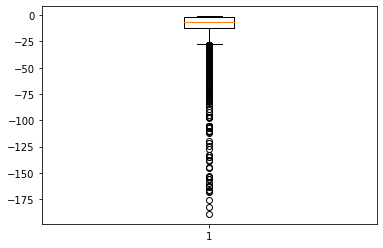

In [41]:
plt.boxplot(d2.difference_of_date)
plt.show()

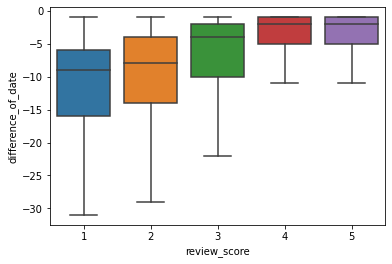

In [42]:
seaborn.boxplot(x= d2['review_score'].astype(int), y='difference_of_date', data=d2, showfliers = False)
plt.show()

Analysis of Boxplot:

1. Assumption: Late delivery is indirectly proportional to review score.
2. Observation: Matches Assumption perfectly
3. Cause of late delivery: 

  3.1 Assumption: Distance

  3.2 Observation:
4. Strategy: 

  4.1 Difference between the zip code of the customer and seller

  4.2 Difference between the order approved date and order carrier date: **pending** 

  suggestion to seller:

  4.3 Increase estimation date
  
  4.4 Change carrier


In [43]:
d2.shape

(7717, 10)

In [44]:
from geopy.distance import geodesic

distance formula applied on d2



In [45]:
distance2 = []
for i in tqdm.tqdm(d2.order_id.to_list()):
  try:
    origin = (d2[d2.order_id == i].seller_lat.to_list()[0], d2[d2.order_id == i].seller_lng.to_list()[0])  # (latitude, longitude) don't confuse
    dest = (d2[d2.order_id == i].customer_lat.to_list()[0], d2[d2.order_id == i].customer_lng.to_list()[0])

    distance2.append(geodesic(origin, dest).kilometers)
  except:
    distance2.append(np.nan)

100%|██████████| 7717/7717 [01:13<00:00, 104.66it/s]


Distance formula applied on d1

In [46]:
# distance = []
# for i in tqdm.tqdm(d1.order_id.to_list()):
#   try:
#     origin = (d1[d1.order_id == i].seller_lat.to_list()[0], d1[d1.order_id == i].seller_lng.to_list()[0])  # (latitude, longitude) don't confuse
#     dest = (d1[d1.order_id == i].customer_lat.to_list()[0], d1[d1.order_id == i].customer_lng.to_list()[0])

#     distance.append(geodesic(origin, dest).kilometers)
#   except:
#     distance.append(np.nan)

In [47]:
# d1['distance'] = distance

In [48]:
# d1.to_excel('/content/drive/My Drive/Colab Notebooks/Brazilian_ECommerce_Dataset/d1_customer_distance_km.xlsx', header = True, index = False)

In [49]:
d1 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Brazilian_ECommerce_Dataset/d1_customer_distance_km.xlsx', dtype = str)
print(d1.shape)

(96274, 11)


In [50]:
d1[:2]

,order_id,order_estimated_delivery_date,order_delivered_customer_date,review_score,customer_lat,customer_lng,seller_lat,seller_lng,difference_of_date,late_early_del_date,distance
0,00024acbcdf0a6daa1e931b038114c75,2018-08-20 00:00:00,2018-08-14 13:32:39,4,-23.047477671213503,-46.67479547760594,-20.532984442771863,-47.366053101687,5,1,287.4521015959971
1,00789ce015e7e5791c7914f32bb4fad4,2017-07-20 00:00:00,2017-07-17 18:35:36,5,-22.87867110141488,-43.5238334248658,-23.481854086844773,-46.47108040888402,2,1,309.0548100161685


In [51]:
d2['distance'] = distance2

In [52]:
d2[:2]

,order_id,order_estimated_delivery_date,order_delivered_customer_date,review_score,customer_lat,customer_lng,seller_lat,seller_lng,difference_of_date,late_early_del_date,distance
0,037d59208a513ace896d132dc8c8a93d,2018-03-27 00:00:00,2018-04-03 20:49:38,3,-10.087639144192849,-48.336759793087595,-22.878061010795907,-47.14357711713783,-8.0,0,1421.177096
1,06c5e0b010707e400bcc627771a27226,2018-04-12 00:00:00,2018-04-13 00:38:35,5,-22.043650622016823,-42.67135816093056,-22.822865877827123,-43.01243981882247,-2.0,0,93.157842


## d2 boxplot

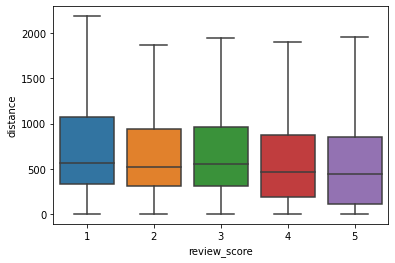

In [53]:
seaborn.boxplot(x= d2['review_score'].astype(int), y='distance', data=d2, showfliers = False)
plt.show()

## d1 boxplot

In [98]:
# seaborn.boxplot(x= d1['review_score'].astype(int), y='distance', data=d1, showfliers = False)
# plt.show()

By state Analysis:

In [56]:
!pip install geopandas
import geopandas as gpd


     |████████████████████████████████| 1.0MB 5.1MB/s 
     |████████████████████████████████| 15.4MB 185kB/s 
     |████████████████████████████████| 6.6MB 24.7MB/s 


In [57]:
INFOS_UFS = gpd.read_file('/content/drive/My Drive/Colab Notebooks/Brazilian_ECommerce_Dataset/bcim_2016_21_11_2018.gpkg' , layer = "lim_unidade_federacao_a")

In [58]:
print(INFOS_UFS.shape)
# INFOS_UFS.head()

(27, 12)


In [81]:
d3 = ecom.drop_duplicates().reset_index(drop = True).groupby('customer_state')['order_id'].count()
d4 = ecom.drop_duplicates().reset_index(drop = True).groupby('seller_state')['order_id'].count()


In [83]:
INFOS_UFS.rename({'sigla': 'customer_state'}, axis = 1, inplace = True)
d3 = INFOS_UFS.merge(d3, on = 'customer_state', how = 'left')

INFOS_UFS.rename({'customer_state': 'seller_state'}, axis = 1, inplace = True)
d4 = INFOS_UFS.merge(d4, on = 'seller_state', how = 'left')

In [61]:
d3 = INFOS_UFS.merge(d3, on = 'customer_state', how = 'left')

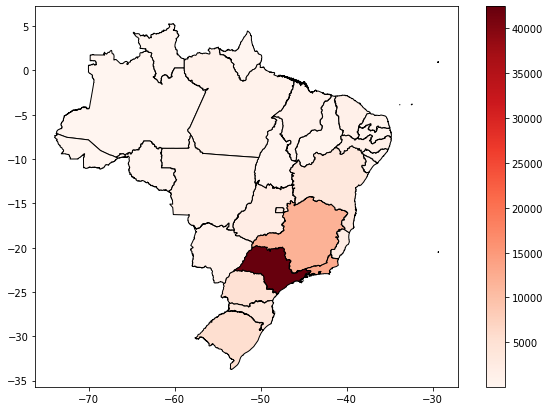

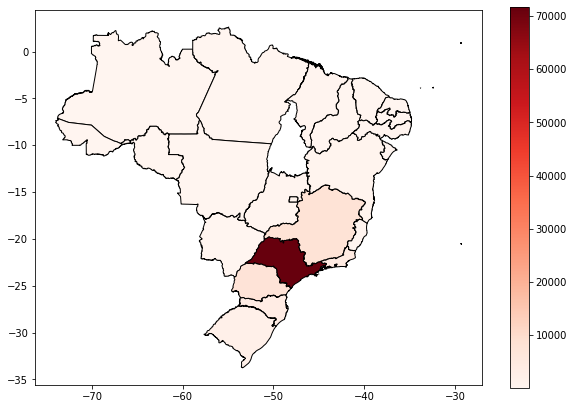

In [93]:
# plt.subplot(121)
d3.plot(column = 'order_id',
        cmap = 'Reds',
        figsize = (10,7),
        legend = True,
        edgecolor = 'black'
)
plt.show()
# plt.subplot(122)

d4.plot(column = 'order_id',
        cmap = 'Reds',
        figsize = (10,7),
        legend = True,
        edgecolor = 'black'
)

plt.show()

In [63]:
d3.columns

Index(['nome', 'nomeabrev', 'geometriaaproximada', 'customer_state',
       'geocodigo', 'id_produtor', 'id_elementoprodutor', 'cd_insumo_orgao',
       'nr_insumo_mes', 'nr_insumo_ano', 'tx_insumo_documento', 'geometry',
       'order_id'],
      dtype='object')

In [64]:
# import plotly.graph_objects as go

# fig = go.Figure(data=go.Scattergeo(
#         lon = d1['customer_lng'],
#         lat = d1['customer_lat'],
#         # text = df['text'],
#         mode = 'markers',
#         marker_color = 'pink'
#         ))

# fig.update_layout(
#         title = 'Most trafficked US airports<br>(Hover for airport names)',
#   geo_scope='south america',  
#     )
# fig.show()

Delivery Time Estimation: ***STOP***

Product_Analysis: **START**

In [65]:
ecom[:2]

,order_id,product_id,product_category_name,product_category_name_english,order_item_counts,shipping_limit_date,price,freight_value,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential_counts,payment_type_boleto,payment_type_not_defined,payment_type_credit_card,payment_type_voucher,payment_type_debit_card,payment_installments_counts,payment_value_boleto,payment_value_not_defined,payment_value_credit_card,payment_value_voucher,payment_value_debit_card,payment_value_total,review_id,review_score,customer_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng
0,00bc78808b22918a467b2fa4b8ef5d68,33fac76e7f17367dedaef7954bbb33b4,beleza_saude,health_beauty,1,2017-04-27 23:42:29,69.0,15.69,56642bcb79900e777d68e91915cb4267,03701,sao paulo,SP,-23.508642761584646,-46.54972341049681,delivered,2017-04-23 23:28:23,2017-04-23 23:42:29,2017-04-25 12:00:40,2017-05-02 13:47:08,2017-05-15 00:00:00,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,84.69,0.0,0.0,84.69,100b6666dd31375f65f183c1e5d97ea6,5,ca0aaedb924d47b85407a1130582b836,37478,soledade de minas,MG,-22.020374999999945,-45.03716449999996
1,00dfb074b5c910fbd08e04691c4b712f,4f3b83b83f7fb280fca4f90ba502f50e,ferramentas_jardim,garden_tools,1,2017-06-19 19:55:19,99.5,35.07,001cca7ae9ae17fb1caed9dfb1094831,29156,cariacica,ES,-20.254806099778452,-40.428039123093406,delivered,2017-06-08 19:43:35,2017-06-08 19:55:19,2017-06-09 15:12:41,2017-06-15 09:03:59,2017-07-10 00:00:00,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,134.57,0.0,0.0,134.57,c7ae6b7ce2981450a84ea641f5b64dc0,5,a5ced4926d7d8fa71e9be2b007720356,08671,suzano,SP,-23.537144699783536,-46.320029136211055


In [66]:
ecom.sort_values(['price'], ascending = [False])[:5]

,order_id,product_id,product_category_name,product_category_name_english,order_item_counts,shipping_limit_date,price,freight_value,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential_counts,payment_type_boleto,payment_type_not_defined,payment_type_credit_card,payment_type_voucher,payment_type_debit_card,payment_installments_counts,payment_value_boleto,payment_value_not_defined,payment_value_credit_card,payment_value_voucher,payment_value_debit_card,payment_value_total,review_id,review_score,customer_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng
95759,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,telefonia_fixa,fixed_telephony,8,2017-10-06 15:28:20,13440.0,224.08,b37c4c02bda3161a7546a4e6d222d5b2,03667,sao paulo,SP,-23.52780220038665,-46.49072166902304,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,0.0,13664.08,0.0,0.0,13664.08,211fa81a22870cc634265ea85b751e40,1,1617b1357756262bfa56ab541c47bc16,20080,rio de janeiro,RJ,-22.8971492647873,-43.182621403139215
13922,736e1922ae60d0d6a89247b851902527,19936fa4f614ee0590d3b77ac83fd648,telefonia_fixa,fixed_telephony,4,2018-07-23 04:31:36,7160.0,114.88,b37c4c02bda3161a7546a4e6d222d5b2,03667,sao paulo,SP,-23.52780220038665,-46.49072166902304,delivered,2018-07-15 14:49:44,2018-07-17 04:31:36,2018-07-20 13:09:00,2018-07-26 22:03:06,2018-08-02 00:00:00,1.0,1.0,0.0,0.0,0.0,0.0,1.0,7274.88,0.0,0.00,0.0,0.0,7274.88,6b9a600f1bb824da4ca38f65baf42526,1,ec5b2ba62e574342386871631fafd3fc,29102,vila velha,ES,-20.333293731092684,-40.34986362495689
74750,0812eb902a67711a1cb742b3cdaa65ae,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,housewares,1,2017-02-16 20:37:36,6735.0,194.31,e3b4998c7a498169dc7bce44e6bb6277,03635,sao paulo,SP,-23.480710438253734,-46.42225054371286,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09 00:00:00,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,0.0,6929.31,0.0,0.0,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5,c6e2731c5b391845f6800c97401a43a9,79042,campo grande,MS,-20.468289666397304,-54.56207806910385
46607,fefacc66af859508bf1a7934eab1e97f,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,computers,1,2018-08-02 04:05:13,6729.0,193.21,80ceebb4ee9b31afb6c6a916a574a1e2,86026,londrina,PR,-23.28606060892157,-51.20335832500434,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10 00:00:00,1.0,1.0,0.0,0.0,0.0,0.0,1.0,6922.21,0.0,0.00,0.0,0.0,6922.21,ac0c6f54ff4bfc295468eb14f31c927f,1,f48d464a0baaea338cb25f816991ab1f,29066,vitoria,ES,-20.272049976715138,-40.28662787748842
9121,f5136e38d1a14a4dbd87dff67da82701,1bdf5e6731585cf01aa8169c7028d6ad,artes,art,1,2017-06-15 02:45:17,6499.0,227.66,ee27a8f15b1dded4d213a468ba4eb391,74210,goiania,GO,-16.66357306633616,-49.32615108259405,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-05-26 11:20:47,2017-06-05 17:09:48,2017-06-28 00:00:00,1.0,1.0,0.0,0.0,0.0,0.0,1.0,6726.66,0.0,0.00,0.0,0.0,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5,3fd6777bbce08a352fddd04e4a7cc8f6,17506,marilia,SP,-22.19686579212495,-49.96157575448745


In [67]:
pp = ecom[['product_category_name_english','price']].sort_values(['price'], ascending = [False])[:5]

top 5 products sold by order_id, and rest of all the products should be others.
Graph: Piechart, Barplot

In [68]:
pd.value_counts(ord.order_status)

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [69]:
pd.value_counts(ecom.order_id)[:5]

ca3625898fbd48669d50701aba51cd5f    8
ad850e69fce9a512ada84086651a2e7d    7
77df84f9195be22a4e9cb72ca9e8b4c2    7
7d8f5bfd5aff648220374a2df62e84d5    7
5a3b1c29a49756e75f1ef513383c0c12    6
Name: order_id, dtype: int64

1st method to use "in" :

In [70]:
most_sold_products = ecom[ecom['order_status'].isin(['delivered','shipped', 'invoiced'])]. \
groupby('product_category_name_english')['order_id'].count().sort_values(ascending = False).reset_index()

2nd method to use "in" :

In [71]:
ecom.query("order_status in ('delivered','shipped', 'invoiced') "). \
groupby('product_category_name_english')['order_id'].count().sort_values(ascending = False).reset_index()[:5]

,product_category_name_english,order_id
0,bed_bath_table,10135
1,health_beauty,8971
2,sports_leisure,7790
3,computers_accessories,6834
4,furniture_decor,6728


In [72]:
most_sold_products[:5]

,product_category_name_english,order_id
0,bed_bath_table,10135
1,health_beauty,8971
2,sports_leisure,7790
3,computers_accessories,6834
4,furniture_decor,6728


  ### Most products sold by product category:

In [73]:
v1 = pd.concat([most_sold_products[:5], 
           pd.DataFrame({'product_category_name_english' : 'others', 'order_id' : sum(most_sold_products.order_id[5:])}, index = [5])
           ])
v1

,product_category_name_english,order_id
0,bed_bath_table,10135
1,health_beauty,8971
2,sports_leisure,7790
3,computers_accessories,6834
4,furniture_decor,6728
5,others,59733


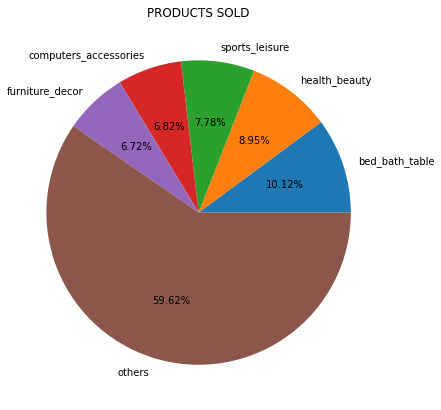

In [74]:
plt.figure(figsize = [7,7])
plt.pie(v1.order_id, labels = v1.product_category_name_english, autopct='%1.2f%%')
plt.title("PRODUCTS SOLD")
plt.show()

In [75]:
ecom[:2]

,order_id,product_id,product_category_name,product_category_name_english,order_item_counts,shipping_limit_date,price,freight_value,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential_counts,payment_type_boleto,payment_type_not_defined,payment_type_credit_card,payment_type_voucher,payment_type_debit_card,payment_installments_counts,payment_value_boleto,payment_value_not_defined,payment_value_credit_card,payment_value_voucher,payment_value_debit_card,payment_value_total,review_id,review_score,customer_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng
0,00bc78808b22918a467b2fa4b8ef5d68,33fac76e7f17367dedaef7954bbb33b4,beleza_saude,health_beauty,1,2017-04-27 23:42:29,69.0,15.69,56642bcb79900e777d68e91915cb4267,03701,sao paulo,SP,-23.508642761584646,-46.54972341049681,delivered,2017-04-23 23:28:23,2017-04-23 23:42:29,2017-04-25 12:00:40,2017-05-02 13:47:08,2017-05-15 00:00:00,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,84.69,0.0,0.0,84.69,100b6666dd31375f65f183c1e5d97ea6,5,ca0aaedb924d47b85407a1130582b836,37478,soledade de minas,MG,-22.020374999999945,-45.03716449999996
1,00dfb074b5c910fbd08e04691c4b712f,4f3b83b83f7fb280fca4f90ba502f50e,ferramentas_jardim,garden_tools,1,2017-06-19 19:55:19,99.5,35.07,001cca7ae9ae17fb1caed9dfb1094831,29156,cariacica,ES,-20.254806099778452,-40.428039123093406,delivered,2017-06-08 19:43:35,2017-06-08 19:55:19,2017-06-09 15:12:41,2017-06-15 09:03:59,2017-07-10 00:00:00,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,134.57,0.0,0.0,134.57,c7ae6b7ce2981450a84ea641f5b64dc0,5,a5ced4926d7d8fa71e9be2b007720356,08671,suzano,SP,-23.537144699783536,-46.320029136211055


In [76]:
most_sold_products_by_year = ecom[ecom['order_status'].isin(['delivered','shipped', 'invoiced'])]. \
groupby([pd.to_datetime(ecom.order_delivered_customer_date).dt.year, 
         'product_category_name_english'])['order_id'].count().sort_values(ascending = False).reset_index()
most_sold_products_by_year.shape

(170, 3)

In [77]:
most_sold_products_by_year.loc[~most_sold_products_by_year.product_category_name_english.isin(v1.product_category_name_english), 'product_category_name_english'] = 'others'

In [78]:
most_sold_products_by_year = most_sold_products_by_year.groupby(['order_delivered_customer_date',	'product_category_name_english'])['order_id'].sum().sort_values(ascending = False).reset_index()
most_sold_products_by_year.shape

(18, 3)

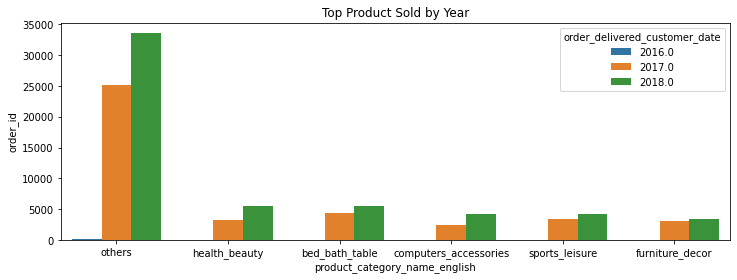

In [79]:
plt.figure(figsize = [12, 4])
seaborn.barplot(x = 'product_category_name_english', y = 'order_id', hue = 'order_delivered_customer_date', data = most_sold_products_by_year)
plt.title("Top Product Sold by Year")
plt.show()

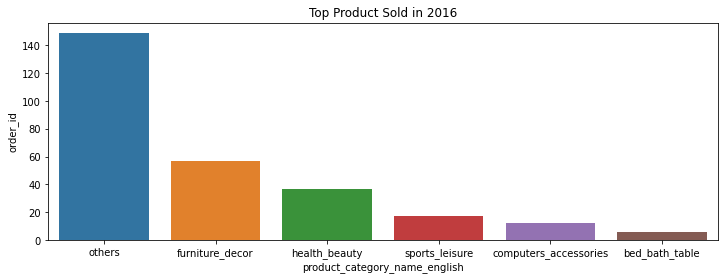

In [80]:
plt.figure(figsize = [12, 4])
seaborn.barplot(x = 'product_category_name_english', y = 'order_id', data = most_sold_products_by_year[most_sold_products_by_year.order_delivered_customer_date == 2016.0])
plt.title("Top Product Sold in 2016")
plt.show()

Product_Analysis: **STOP**

Sesonality of product Category:

In [97]:
ecom[:2]
ecom.shape

(100942, 41)

In [102]:
d5 = ecom[['order_id', 'order_delivered_customer_date', 'product_category_name_english']].drop_duplicates().reset_index(drop = True) 
d5['month'] = pd.to_datetime(ecom.order_delivered_customer_date).dt.month
print(d5.shape)
d5[:2]

(97996, 4)


,order_id,order_delivered_customer_date,product_category_name_english,month
0,00bc78808b22918a467b2fa4b8ef5d68,2017-05-02 13:47:08,health_beauty,5.0
1,00dfb074b5c910fbd08e04691c4b712f,2017-06-15 09:03:59,garden_tools,6.0


In [107]:
d5.groupby(['product_category_name_english', 'month'])['order_id'].count()


product_category_name_english  month
agro_industry_and_commerce     1.0       11
                               2.0       12
                               3.0       19
                               4.0       20
                               5.0       14
                                       ... 
watches_gifts                  8.0      704
                               9.0      226
                               10.0     253
                               11.0     260
                               12.0     385
Name: order_id, Length: 809, dtype: int64

In [99]:
ecom.columns

Index(['order_id', 'product_id', 'product_category_name',
       'product_category_name_english', 'order_item_counts',
       'shipping_limit_date', 'price', 'freight_value', 'seller_id',
       'seller_zip_code_prefix', 'seller_city', 'seller_state', 'seller_lat',
       'seller_lng', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential_counts', 'payment_type_boleto',
       'payment_type_not_defined', 'payment_type_credit_card',
       'payment_type_voucher', 'payment_type_debit_card',
       'payment_installments_counts', 'payment_value_boleto',
       'payment_value_not_defined', 'payment_value_credit_card',
       'payment_value_voucher', 'payment_value_debit_card',
       'payment_value_total', 'review_id', 'review_score', 'customer_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'customer_lat', 'c